## Scikit_Learn California Housing Data
## Regression Analysis and Prediction

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [51]:
from sklearn.datasets import fetch_california_housing

In [52]:
print(__doc__)

Automatically created module for IPython interactive environment


In [53]:
cal_housing = fetch_california_housing()
#print(cal_housing.DESCR)

## Data Load, Check, Clean, Split for Train and Test

### loading

In [54]:
# extract data, target
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [55]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
# data shape
print(X.shape, y.shape)

(20640, 8) (20640,)


In [57]:
# save cal_df into csv for futher operation
cal_df = X.copy()
cal_df["midhouseval"] = y
cal_df.to_csv("data/cal_housing.csv")
# cal_df.head()

In [58]:
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### drop nan

In [59]:
#drop nan
cal_df.dropna()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### drop duplicates

In [60]:
#drop duplicates
cal_df.drop_duplicates(keep = 'last') 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [61]:
len(cal_df)

20640

### use boxplot check there is any outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5b1afeeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5b1b06be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5b1afe6d8>,
 'medians': [<matplotlib.lines.Line2D at 0x1f5b1b06860>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f5b1b06748>,
 'means': []}

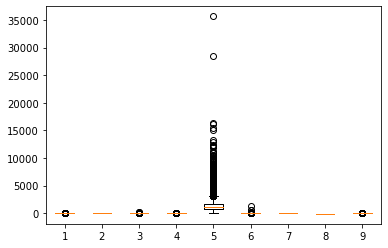

In [62]:
# check for outliers find there are quite few outliers in column Population
plt.boxplot(cal_df)

### check quantiles for each column

In [63]:
cal_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhouseval
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [64]:
#check the original len()
rows_original = len(cal_df)
rows_original

20640

## remove all the outliers from each column except "Latitude" and "Logitude"

In [65]:
columns = [x for x in cal_df.columns]
# columns

In [66]:
for col in columns:
    if col == "Latitude" or "Logitude":
        #print("passed")
        pass
    Q1 = cal_df[col].quantile(0.25)
    Q3 = cal_df[col].quantile(0.75)
    IQR = Q3 - Q1

    cal_df = cal_df[~((cal_df[col] < (Q1 - 1.5 * IQR)) | (cal_df[col] > (Q3 + 1.5 * IQR)))]


In [67]:
rows_after = len(cal_df)
outlier_rows = rows_original - rows_after
outlier_rows

4408

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5af9c9f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5af9c9f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5af9c98d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f5af9c9588>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f5af97af60>,
 'means': []}

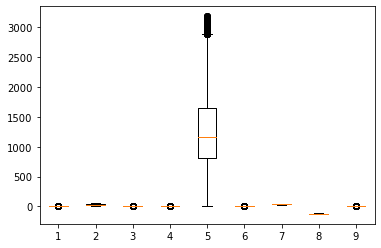

In [68]:
plt.boxplot(cal_df)

In [69]:
clean_df = cal_df.copy()
clean_df.to_csv("data/clearned_cal_housing.csv", index = False)

In [70]:
len(clean_df)

16232

In [71]:
newdf = pd.read_csv("data/clearned_cal_housing.csv")
newdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhouseval
0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
2,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
3,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
4,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414


In [72]:
X = newdf.drop(['midhouseval'], axis=1)
y = newdf['midhouseval']
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
2,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
3,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
4,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25


In [73]:
#y = y.values.reshape(-1, 1)
y = np.array(y)
y

array([3.413, 3.422, 2.697, ..., 0.923, 0.847, 0.894])

In [74]:
print(X.shape, y.shape)

(16232, 8) (16232,)


### split data into train and test sets

In [75]:
y.min()

0.14999

In [76]:
# split the data into train(0.8) and test(0.2), to facilitate use y -= y.mean()

from sklearn.model_selection import train_test_split

#y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

## Test LinearRegression Without Preprocessing, R2 Score = 0.65

In [77]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
t = time()
model.fit(X_train, y_train)
print(f"done in {time() - t:.3f}s")
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
print(f" MSE : {MSE :.2f}")
print(f"Test R2 score: {model.score(X_test, y_test):.2f}")

done in 0.007s
 MSE : 0.30
Test R2 score: 0.65


In [79]:
prediction = model.predict(X_test)
pred1_df = pd.DataFrame({"Prediction": prediction, "Actual": y_test})
pd.DataFrame({"Prediction": prediction, "Actual": y_test})

,Prediction,Actual
0,3.578695,3.974
1,2.775088,1.617
2,0.790595,1.063
3,2.395898,1.887
4,2.626811,1.426
...,...,...
3242,3.936514,4.239
3243,2.185842,2.441
3244,2.144661,2.132
3245,2.108110,1.673


Text(0.5, 1.0, 'Prediction vs Actual')

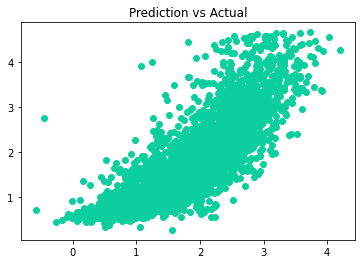

In [80]:
plt.scatter(pred1_df["Prediction"], pred1_df["Actual"], c="#0DCE9E")
plt.title("Prediction vs Actual")

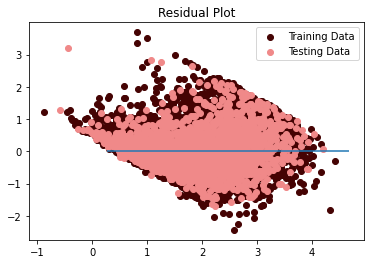

In [81]:
# residual plot
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="#450303", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="#F08989", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

## Test with Preprocessing StandardScaler and LinearRegressor Test R2 Score = 0.64

In [31]:
#Preprocessing X_train, X_test with StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

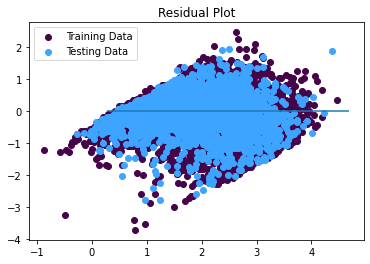

In [32]:
#Train Model2 and calculate the residual plot
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
plt.scatter(model2.predict(X_train_scaled), model2.predict(X_train_scaled) - y_train, c="#450349", label="Training Data")
plt.scatter(model2.predict(X_test_scaled), model2.predict(X_test_scaled) - y_test, c="#3DA5FF", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [33]:
predictions = model2.predict(X_test_scaled)
MSE2 = mean_squared_error(y_test, predictions)
r2_2 = model2.score(X_test_scaled, y_test)

print(f"MSE: {MSE2}, R2: {r2_2}")

MSE: 0.31957060247724267, R2: 0.62453933163988


## Test Lasso Model with Test R2 = 0.64

In [34]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train)

predictions = lasso.predict(X_test_scaled)

MSE3 = mean_squared_error(y_test, predictions)
r2_3 = lasso.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE3}, R2: {r2_3}")

MSE: 0.3226082032459005, R2: 0.6209704814203335


## Test ElasticNet Model with Test R2 = 0.64

In [35]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)

predictions4 = elasticnet.predict(X_test_scaled)

MSE4 = mean_squared_error(y_test, predictions4)
r2_4 = elasticnet.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE4}, R2: {r2_4}")

MSE: 0.32185376754859857, R2: 0.6218568612342086


## Test Ridge Model with Test R2 = 0.65

In [36]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)

predictions5 = ridge.predict(X_test_scaled)

MSE5 = mean_squared_error(y_test, predictions5)
r2_5 = ridge.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE5}, R2: {r2_5}")

MSE: 0.3195706525808219, R2: 0.6245392727736288


## Test Preprocessing QuantileTransformer, and MLPRegressor
## Test R2 Score = 0.79

In [37]:
# build pipeline to do the job and check the score
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
# predictions6 = est.predict(X_test_scaled)
# MSE6 = mean_squared_error(y_test, predictions6)
print(f"done in {time() - tic:.3f}s")
#print(f"MSE : {MSE6 : .2f}")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 4.968s
Test R2 score: 0.75


In [38]:
# build predction df with columns Prediction and Actual
predicted6 = est.predict(X_test)
pred_df = pd.DataFrame({"Prediction": predicted6, "Actual": y_test})

In [39]:
# alculate MeanSquared Error(MSE) and R-Squared (R2)
mse = mean_squared_error(y_test, predicted6)
r2 = r2_score(y_test, predicted6)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.21238204461781043
R-squared (R2 ): 0.7504742182110744


Text(0.5, 1.0, 'Prediction vs Actual')

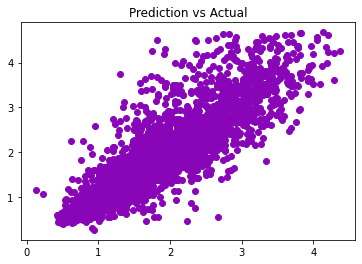

In [40]:
# plot prediction vs Actual
plt.scatter(pred_df["Prediction"], pred_df["Actual"], c="#8806B7")
plt.title("Prediction vs Actual")

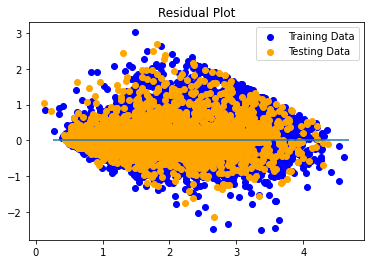

In [41]:
# residual plot
plt.scatter(est.predict(X_train), y_train - est.predict(X_train), c="blue", label="Training Data")
plt.scatter(est.predict(X_test), y_test - est.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

## Test HistGradientBoostingRegressor,
## Test R2 Score = 0.83 and MSE = 0.16

In [42]:
# Use HistGradientBoostingRegressor and calculate r2 score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic2 = time()
est2 = HistGradientBoostingRegressor()
est2.fit(X_train, y_train)
print(f"done in {time() - tic2:.3f}s")
print(f"Test R2 score: {est2.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
done in 1.262s
Test R2 score: 0.81


In [43]:
# build predction df with columns Prediction and Actual
predicted7 = est2.predict(X_test)
pd.DataFrame({"Prediction": predicted7, "Actual": y_test})

,Prediction,Actual
0,2.294328,1.793
1,2.043670,1.823
2,1.640463,1.731
3,2.709307,2.708
4,1.123334,1.183
...,...,...
3242,1.075606,1.121
3243,2.426502,2.306
3244,2.556173,2.761
3245,1.582751,1.555


In [44]:
mse7 = mean_squared_error(y_test, predicted7)
print(f"Mean Squared Error (MSE): {mse7}")

Mean Squared Error (MSE): 0.1638977947006367


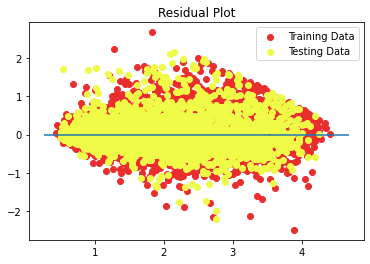

In [45]:
# residual plot
plt.scatter(est2.predict(X_train), y_train - est2.predict(X_train), c="#EA2E2E", label="Training Data")
plt.scatter(est2.predict(X_test), y_test - est2.predict(X_test), c="#EFFB46", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

## save and reload models

In [46]:
import pickle
# save the model to disk
filename = 'est2_model.sav'
pickle.dump(est2, open(filename, 'wb'))

In [47]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8074379337021996
